In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/train.csv')
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568,Unnamed: 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.854928e-19,-1.329011e-20,4.204335e-21,4.428740e-21,4.461340e-23,2.376798e-24,-7.807106e-24,2.379322e-24,-5.582096e-26,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.118652e-20,4.062297e-21,-7.743107e-21,8.638654e-22,-1.006311e-21,-2.267525e-22,-5.867730e-23,4.858047e-24,-4.595498e-25,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.619224e-20,-3.590984e-20,-2.717642e-20,1.923565e-20,-2.244442e-21,-4.244237e-24,-3.599564e-23,7.471194e-24,-3.815300e-24,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.346105e-19,-6.278001e-19,-5.786255e-19,2.573141e-19,2.385063e-19,6.655487e-20,2.834975e-20,3.356577e-21,1.698628e-21,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.494150e-20,-1.187973e-20,-1.450941e-21,8.954877e-22,-2.645088e-22,1.365356e-23,8.062470e-24,-1.235689e-24,1.890073e-25,NaN


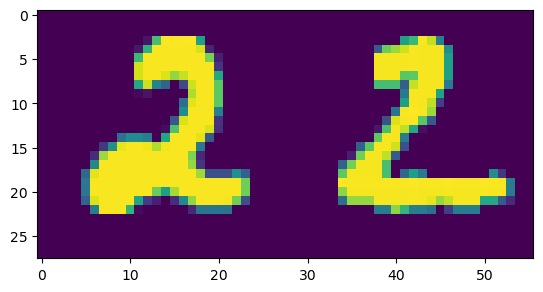

In [6]:
image0 = df.iloc[3, :-1]
image0
plt.imshow(np.array(image0).reshape(28,56))

In [7]:
y = pd.read_csv('data/train_result.csv', index_col = 0).reset_index(drop=True)

In [60]:
y = y.values.reshape(y.values.shape[0])

In [6]:
x_train = df.iloc[:40000, :-1]
y_train = y[:40000]
x_test = df.iloc[40000:, :-1]
y_test = y[40000:]

In [211]:
from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier()
dtree.fit(x_train , y_train)

DecisionTreeClassifier()

In [212]:
dtree.score(x_test , y_test) 

0.4165

In [213]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rforest.fit(x_train , np.ravel(y_train))

RandomForestClassifier()

In [214]:
rforest.score(x_test,y_test) 

0.7092

In [215]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train ,np.ravel(y_train))


KNeighborsClassifier()

In [216]:
y_pred = knn.predict(x_test)


In [217]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.6228

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [13]:
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from tensorflow.keras.layers import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical


In [4]:
x_train

NameError: name 'x_train' is not defined

In [9]:
X = x_train.values.reshape(-1,28,56,1)

In [10]:
X_test = x_test.values.reshape(-1,28,56,1)

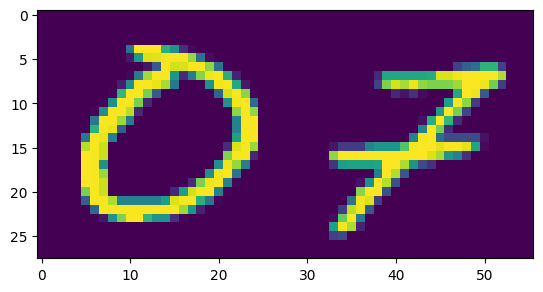

In [11]:
plt.imshow(X_test[1])

In [12]:
y_train = to_categorical(y_train)

In [13]:
y_test = to_categorical(y_test)

In [14]:
y_train.shape


(40000, 19)

In [15]:
y_train[1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

In [16]:
X.shape

(40000, 28, 56, 1)

Metal device set to: Apple M1


2022-10-24 18:49:07.438024: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-24 18:49:07.438864: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


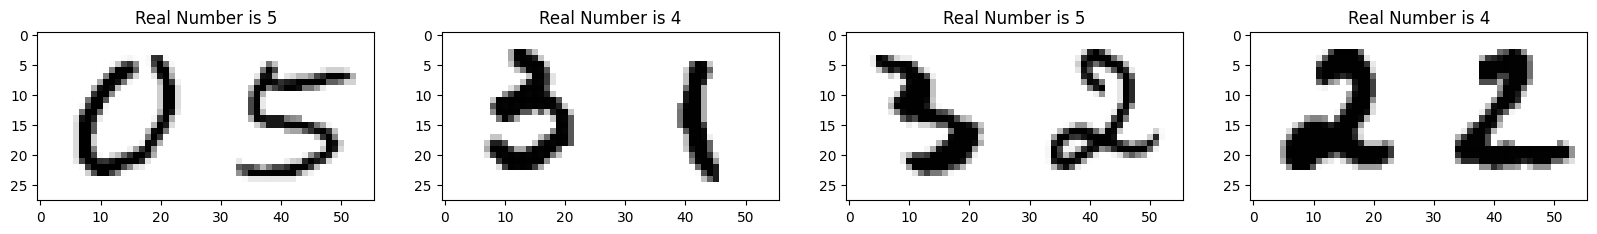

In [17]:
model=Sequential()
X_train__ = X.reshape(X.shape[0], 28, 56)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

In [18]:
mean = np.mean(X)
std = np.std(X)

def standardize(x):
    return (x-mean)/std

In [19]:
X.shape[1:]

(28, 56, 1)

In [20]:

# model.add(Lambda(standardize,input_shape=(28,56,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=X.shape[1:]))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(19,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 54, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 52, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 26, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 26, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 24, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 22, 128)        1

In [22]:
epochs = 100
batch_size = 128
train_steps = X.shape[0] // batch_size
valid_steps = X_test.shape[0] // batch_size

es = keras.callbacks.EarlyStopping(
        monitor="val_acc", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, # 
     )

rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_acc",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [23]:
X[1].shape

(28, 56, 1)

In [55]:
model.fit(X, y_train, batch_size=batch_size, validation_split=0.2, epochs=10)

Epoch 1/100


2022-10-24 19:12:59.005029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 66/313 [=====>........................] - ETA: 18s - loss: 0.0228 - accuracy: 0.9923

KeyboardInterrupt: 

In [25]:
y_pred = model.predict(X_test)

 14/313 [>.............................] - ETA: 2s

2022-10-24 18:52:25.817311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 9ms/step


In [27]:
import itertools

313/313 [==============================] - 3s 9ms/step


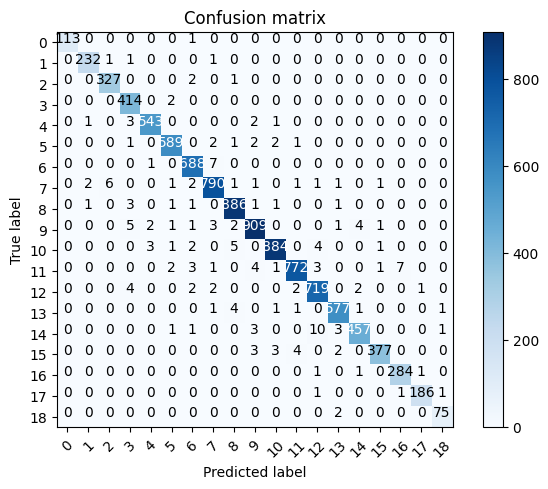

In [28]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
# Y_true = to_categorical(y_test)
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(19)) 


In [29]:
np.argmax(y_pred, axis=1)

array([12,  2, 17, ...,  1,  7,  9])

In [30]:
def for_submission(arr):
    with open('submission.csv', 'w') as f:
        f.writelines('Index, Class\n')
        for x in range(arr.shape[0]):
            print(str(x)+', '+ str(arr[x]))
            f.writelines(str(x)+', '+ str(arr[x])+'\n')

In [31]:
y_final =np.argmax(y_pred, axis=1)
for_submission(y_final)

0, 12
1, 2
2, 17
3, 13
4, 7
5, 6
6, 12
7, 8
8, 6
9, 8
10, 4
11, 3
12, 8
13, 12
14, 7
15, 11
16, 3
17, 15
18, 16
19, 5
20, 16
21, 12
22, 9
23, 11
24, 11
25, 16
26, 7
27, 10
28, 12
29, 2
30, 11
31, 11
32, 7
33, 4
34, 5
35, 14
36, 7
37, 6
38, 2
39, 2
40, 12
41, 8
42, 8
43, 9
44, 12
45, 10
46, 6
47, 11
48, 10
49, 13
50, 8
51, 12
52, 5
53, 11
54, 1
55, 10
56, 17
57, 7
58, 6
59, 6
60, 6
61, 15
62, 4
63, 9
64, 13
65, 12
66, 1
67, 15
68, 14
69, 6
70, 9
71, 17
72, 10
73, 9
74, 7
75, 14
76, 3
77, 8
78, 15
79, 5
80, 4
81, 6
82, 3
83, 6
84, 14
85, 8
86, 6
87, 6
88, 8
89, 13
90, 12
91, 11
92, 13
93, 6
94, 9
95, 10
96, 4
97, 4
98, 6
99, 1
100, 14
101, 10
102, 5
103, 11
104, 10
105, 4
106, 11
107, 6
108, 1
109, 1
110, 9
111, 5
112, 4
113, 9
114, 7
115, 16
116, 4
117, 15
118, 2
119, 14
120, 12
121, 15
122, 7
123, 14
124, 15
125, 5
126, 15
127, 6
128, 6
129, 10
130, 13
131, 5
132, 16
133, 16
134, 16
135, 12
136, 15
137, 6
138, 6
139, 4
140, 13
141, 3
142, 13
143, 7
144, 5
145, 9
146, 6
147, 9
148, 4
14

In [32]:
df_y = pd.DataFrame(y_final).reset_index()
df_y

,index,0
0,0,12
1,1,2
2,2,17
3,3,13
4,4,7
...,...,...
9995,9995,9
9996,9996,14
9997,9997,1
9998,9998,7


In [33]:
df_y.columns = ['Index', 'Class']

In [34]:
df_y.to_csv('pd-submission.csv', index=False)

In [43]:
df_test = pd.read_csv('data/test.csv')
df_test = df_test.iloc[:,:-1]
df_test

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1559,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.955389e-23,-4.232597e-23,-1.371348e-23,-4.941302e-24,4.701897e-24,9.137646e-24,-5.964309e-25,-8.037856e-27,1.607571e-26,1.896144e-27
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.713258e-20,-3.072854e-20,1.208471e-20,8.119634e-22,-4.124326e-21,-2.351743e-22,-1.139683e-23,-1.730485e-24,-1.088523e-24,-1.192788e-25
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.737605e-19,1.010960e-17,1.299321e-20,1.007092e-20,-1.007821e-20,2.289849e-21,-8.811264e-22,2.288049e-22,-6.056319e-23,-1.302198e-23
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.688333e-22,1.262406e-22,-1.204514e-23,-9.310054e-24,-1.898251e-24,-1.192600e-25,-2.870280e-26,-2.612264e-27,-7.700169e-27,-3.745563e-27
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.748979e-21,-1.613074e-21,-3.539335e-21,-6.962758e-20,1.694034e-19,-3.988890e-20,-5.779639e-22,5.424119e-21,1.102504e-22,-2.005880e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.176424e-21,2.125517e-22,-5.571208e-23,1.215935e-22,1.939962e-22,-1.638395e-22,-3.236651e-24,4.809522e-25,-1.347239e-25,5.794320e-26
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.372621e-20,6.099703e-21,-8.780294e-22,-6.306931e-22,-1.059037e-21,6.598977e-23,5.641922e-23,1.521738e-23,5.845244e-25,2.289112e-25
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.796364e-20,-1.969505e-20,-1.698103e-22,2.043203e-22,5.397814e-23,-3.642104e-23,-5.222338e-23,-8.629898e-24,1.129773e-24,-2.509890e-26
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.536667e-20,-5.036675e-21,2.582385e-22,1.224506e-22,3.189655e-23,-7.812957e-24,-2.556415e-24,2.959303e-25,1.060729e-25,1.069585e-25


In [44]:
df_test = df_test.values.reshape(-1,28,56,1)

In [48]:
y_pred = model.predict(df_test)

313/313 [==============================] - 3s 9ms/step


In [50]:
y_pred = np.argmax(y_pred, axis=1)

In [51]:
y_pred

array([14,  7, 10, ..., 10,  4,  6])

In [52]:
df_y = pd.DataFrame(y_pred).reset_index()
df_y

,index,0
0,0,14
1,1,7
2,2,10
3,3,7
4,4,5
...,...,...
9995,9995,7
9996,9996,12
9997,9997,10
9998,9998,4


In [53]:
df_y.columns = ['Index', 'Class']

In [54]:
df_y.to_csv('pd-submission.csv', index=False)

In [8]:
df = pd.read_csv('data/train.csv')
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568,Unnamed: 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.854928e-19,-1.329011e-20,4.204335e-21,4.428740e-21,4.461340e-23,2.376798e-24,-7.807106e-24,2.379322e-24,-5.582096e-26,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.118652e-20,4.062297e-21,-7.743107e-21,8.638654e-22,-1.006311e-21,-2.267525e-22,-5.867730e-23,4.858047e-24,-4.595498e-25,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.619224e-20,-3.590984e-20,-2.717642e-20,1.923565e-20,-2.244442e-21,-4.244237e-24,-3.599564e-23,7.471194e-24,-3.815300e-24,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.346105e-19,-6.278001e-19,-5.786255e-19,2.573141e-19,2.385063e-19,6.655487e-20,2.834975e-20,3.356577e-21,1.698628e-21,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.494150e-20,-1.187973e-20,-1.450941e-21,8.954877e-22,-2.645088e-22,1.365356e-23,8.062470e-24,-1.235689e-24,1.890073e-25,NaN


In [9]:
y = pd.read_csv('data/train_result.csv', index_col=0)
y

,Class
Index,
0,5
1,4
2,5
3,4
4,4
...,...
49995,9
49996,14
49997,1


In [10]:
X = df.iloc[:,:-1]
X

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1559,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.281934e-19,3.854928e-19,-1.329011e-20,4.204335e-21,4.428740e-21,4.461340e-23,2.376798e-24,-7.807106e-24,2.379322e-24,-5.582096e-26
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.714815e-19,-7.118652e-20,4.062297e-21,-7.743107e-21,8.638654e-22,-1.006311e-21,-2.267525e-22,-5.867730e-23,4.858047e-24,-4.595498e-25
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.968480e-20,-4.619224e-20,-3.590984e-20,-2.717642e-20,1.923565e-20,-2.244442e-21,-4.244237e-24,-3.599564e-23,7.471194e-24,-3.815300e-24
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256463e-20,-5.346105e-19,-6.278001e-19,-5.786255e-19,2.573141e-19,2.385063e-19,6.655487e-20,2.834975e-20,3.356577e-21,1.698628e-21
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.446271e-19,5.494150e-20,-1.187973e-20,-1.450941e-21,8.954877e-22,-2.645088e-22,1.365356e-23,8.062470e-24,-1.235689e-24,1.890073e-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.806037e-19,-9.956413e-22,7.012638e-21,-1.749799e-21,-5.296019e-22,5.324962e-23,-7.651382e-24,-1.189074e-23,-3.929069e-24,1.550829e-24
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.120559e-21,-2.386547e-22,3.369363e-23,1.459011e-23,5.123315e-25,-5.553792e-25,-1.656932e-25,-4.579053e-26,5.280697e-26,1.550841e-26
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.683112e-18,-1.566546e-20,6.858092e-21,1.256228e-21,-3.157088e-22,1.984213e-23,1.134711e-23,-3.192012e-24,1.801697e-25,-1.020857e-26
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.349202e-20,-1.839305e-21,3.174579e-20,7.510705e-21,-1.584091e-21,9.770302e-23,1.247588e-22,5.449431e-24,2.336028e-24,2.577251e-24


In [11]:
X = X.values.reshape((-1,28,56,1))
X

array([[[[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 1.37591740e-21],
         [ 5.30417960e-22],
         [-3.57824900e-24]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 2.48994830e-21],
         [ 6.31696440e-22],
         [-3.58053030e-22]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 2.00505800e-21],
         [ 1.07208180e-21],
         [-2.05822040e-21]],

        ...,

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 1.86626740e-23],
         [-7.54684500e-24],
         [-2.40440590e-23]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 1.71384430e-23],
         [-2.84402220e-24],
         [ 4.41500800e-25]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [

In [12]:
y = to_categorical(y)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
X.shape

(50000, 28, 56, 1)

In [14]:
y.shape

(50000, 19)

In [15]:
model=Sequential()

In [16]:
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=X.shape[1:]))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(19,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 54, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 52, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 26, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 26, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 24, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 22, 128)        1

In [18]:
model.fit(X, y, batch_size=128, epochs=1000)

Epoch 1/1000
391/391 [==============================] - 14s 19ms/step - loss: 0.6515 - accuracy: 0.7968
Epoch 2/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0756 - accuracy: 0.9764
Epoch 3/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0392 - accuracy: 0.9881
Epoch 4/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0256 - accuracy: 0.9917
Epoch 5/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0210 - accuracy: 0.9933
Epoch 6/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0239 - accuracy: 0.9920
Epoch 7/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0212 - accuracy: 0.9932
Epoch 8/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0186 - accuracy: 0.9947
Epoch 9/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0175 - accuracy: 0.9949
Epoch 10/1000
391/391 [==============================] - 7s 18ms/step - 

391/391 [==============================] - 7s 18ms/step - loss: 9.6906e-04 - accuracy: 0.9998
Epoch 157/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 158/1000
391/391 [==============================] - 7s 18ms/step - loss: 8.5646e-04 - accuracy: 0.9998
Epoch 159/1000
391/391 [==============================] - 7s 18ms/step - loss: 2.4458e-04 - accuracy: 1.0000
Epoch 160/1000
391/391 [==============================] - 7s 18ms/step - loss: 4.8711e-04 - accuracy: 0.9999
Epoch 161/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 162/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0046 - accuracy: 0.9992
Epoch 163/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0019 - accuracy: 0.9996
Epoch 164/1000
391/391 [==============================] - 7s 18ms/step - loss: 3.3288e-04 - accuracy: 0.9999
Epoch 165/1000
391/391 [==========================

391/391 [==============================] - 7s 18ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 309/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0023 - accuracy: 0.9998
Epoch 310/1000
391/391 [==============================] - 7s 18ms/step - loss: 5.3775e-04 - accuracy: 0.9999
Epoch 311/1000
391/391 [==============================] - 7s 18ms/step - loss: 4.8154e-04 - accuracy: 0.9999
Epoch 312/1000
391/391 [==============================] - 7s 18ms/step - loss: 2.3681e-04 - accuracy: 0.9999
Epoch 313/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0019 - accuracy: 0.9997
Epoch 314/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0024 - accuracy: 0.9997
Epoch 315/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0020 - accuracy: 0.9997
Epoch 316/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 317/1000
391/391 [==============================] - 

391/391 [==============================] - 7s 18ms/step - loss: 2.4397e-06 - accuracy: 1.0000
Epoch 461/1000
391/391 [==============================] - 7s 18ms/step - loss: 1.3686e-05 - accuracy: 1.0000
Epoch 462/1000
391/391 [==============================] - 7s 18ms/step - loss: 5.8896e-04 - accuracy: 0.9999
Epoch 463/1000
391/391 [==============================] - 7s 18ms/step - loss: 6.7248e-04 - accuracy: 0.9999
Epoch 464/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0017 - accuracy: 0.9998
Epoch 465/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 466/1000
391/391 [==============================] - 7s 18ms/step - loss: 1.6360e-04 - accuracy: 0.9999
Epoch 467/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0017 - accuracy: 0.9998
Epoch 468/1000
391/391 [==============================] - 7s 18ms/step - loss: 6.9564e-04 - accuracy: 0.9999
Epoch 469/1000
391/391 [======================

391/391 [==============================] - 7s 18ms/step - loss: 1.8175e-06 - accuracy: 1.0000
Epoch 537/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0016 - accuracy: 0.9998
Epoch 538/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0017 - accuracy: 0.9998
Epoch 539/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 540/1000
391/391 [==============================] - 7s 18ms/step - loss: 6.5308e-04 - accuracy: 0.9999
Epoch 541/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0013 - accuracy: 0.9998
Epoch 542/1000
391/391 [==============================] - 7s 18ms/step - loss: 2.0845e-05 - accuracy: 1.0000
Epoch 543/1000
391/391 [==============================] - 7s 18ms/step - loss: 2.9008e-06 - accuracy: 1.0000
Epoch 544/1000
391/391 [==============================] - 7s 18ms/step - loss: 9.8509e-06 - accuracy: 1.0000
Epoch 545/1000
391/391 [==========================

391/391 [==============================] - 7s 18ms/step - loss: 4.9997e-07 - accuracy: 1.0000
Epoch 687/1000
391/391 [==============================] - 7s 18ms/step - loss: 1.2914e-07 - accuracy: 1.0000
Epoch 688/1000
391/391 [==============================] - 7s 18ms/step - loss: 1.0401e-06 - accuracy: 1.0000
Epoch 689/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0025 - accuracy: 0.9997
Epoch 690/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0011 - accuracy: 0.9999
Epoch 691/1000
391/391 [==============================] - 7s 18ms/step - loss: 7.4800e-05 - accuracy: 1.0000
Epoch 692/1000
391/391 [==============================] - 7s 18ms/step - loss: 2.7123e-05 - accuracy: 1.0000
Epoch 693/1000
391/391 [==============================] - 7s 18ms/step - loss: 3.2802e-05 - accuracy: 1.0000
Epoch 694/1000
391/391 [==============================] - 7s 18ms/step - loss: 8.5759e-05 - accuracy: 1.0000
Epoch 695/1000
391/391 [==================

391/391 [==============================] - 7s 18ms/step - loss: 1.6689e-11 - accuracy: 1.0000
Epoch 837/1000
391/391 [==============================] - 7s 18ms/step - loss: 6.4611e-10 - accuracy: 1.0000
Epoch 838/1000
391/391 [==============================] - 7s 18ms/step - loss: 3.0041e-10 - accuracy: 1.0000
Epoch 839/1000
391/391 [==============================] - 7s 18ms/step - loss: 1.5497e-10 - accuracy: 1.0000
Epoch 840/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0039 - accuracy: 0.9996
Epoch 841/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0030 - accuracy: 0.9996
Epoch 842/1000
391/391 [==============================] - 7s 18ms/step - loss: 4.6666e-05 - accuracy: 1.0000
Epoch 843/1000
391/391 [==============================] - 7s 18ms/step - loss: 1.3660e-04 - accuracy: 1.0000
Epoch 844/1000
391/391 [==============================] - 7s 18ms/step - loss: 3.2509e-04 - accuracy: 1.0000
Epoch 845/1000
391/391 [==================

Epoch 912/1000
391/391 [==============================] - 7s 18ms/step - loss: 2.2776e-07 - accuracy: 1.0000
Epoch 913/1000
391/391 [==============================] - 7s 18ms/step - loss: 2.5152e-09 - accuracy: 1.0000
Epoch 914/1000
391/391 [==============================] - 7s 18ms/step - loss: 3.4595e-08 - accuracy: 1.0000
Epoch 915/1000
391/391 [==============================] - 7s 18ms/step - loss: 5.9296e-04 - accuracy: 1.0000
Epoch 916/1000
391/391 [==============================] - 7s 18ms/step - loss: 6.5213e-04 - accuracy: 0.9999
Epoch 917/1000
391/391 [==============================] - 7s 18ms/step - loss: 7.2235e-04 - accuracy: 0.9999
Epoch 918/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 919/1000
391/391 [==============================] - 7s 18ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 920/1000
391/391 [==============================] - 7s 18ms/step - loss: 2.9990e-04 - accuracy: 1.0000
Epoch 921/1000
391/391 [===

In [19]:
df_test = pd.read_csv('data/test.csv')
df_test = df_test.iloc[:,:-1]
df_test

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1559,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.955389e-23,-4.232597e-23,-1.371348e-23,-4.941302e-24,4.701897e-24,9.137646e-24,-5.964309e-25,-8.037856e-27,1.607571e-26,1.896144e-27
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.713258e-20,-3.072854e-20,1.208471e-20,8.119634e-22,-4.124326e-21,-2.351743e-22,-1.139683e-23,-1.730485e-24,-1.088523e-24,-1.192788e-25
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.737605e-19,1.010960e-17,1.299321e-20,1.007092e-20,-1.007821e-20,2.289849e-21,-8.811264e-22,2.288049e-22,-6.056319e-23,-1.302198e-23
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.688333e-22,1.262406e-22,-1.204514e-23,-9.310054e-24,-1.898251e-24,-1.192600e-25,-2.870280e-26,-2.612264e-27,-7.700169e-27,-3.745563e-27
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.748979e-21,-1.613074e-21,-3.539335e-21,-6.962758e-20,1.694034e-19,-3.988890e-20,-5.779639e-22,5.424119e-21,1.102504e-22,-2.005880e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.176424e-21,2.125517e-22,-5.571208e-23,1.215935e-22,1.939962e-22,-1.638395e-22,-3.236651e-24,4.809522e-25,-1.347239e-25,5.794320e-26
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.372621e-20,6.099703e-21,-8.780294e-22,-6.306931e-22,-1.059037e-21,6.598977e-23,5.641922e-23,1.521738e-23,5.845244e-25,2.289112e-25
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.796364e-20,-1.969505e-20,-1.698103e-22,2.043203e-22,5.397814e-23,-3.642104e-23,-5.222338e-23,-8.629898e-24,1.129773e-24,-2.509890e-26
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.536667e-20,-5.036675e-21,2.582385e-22,1.224506e-22,3.189655e-23,-7.812957e-24,-2.556415e-24,2.959303e-25,1.060729e-25,1.069585e-25


In [20]:
df_test = df_test.values.reshape(-1,28,56,1)

In [21]:
y_pred = model.predict(df_test)

313/313 [==============================] - 1s 2ms/step


In [22]:
y_pred = np.argmax(y_pred, axis=1)

In [23]:
df_y = pd.DataFrame(y_pred).reset_index()
df_y

,index,0
0,0,14
1,1,7
2,2,10
3,3,7
4,4,5
...,...,...
9995,9995,7
9996,9996,12
9997,9997,10
9998,9998,4


In [24]:
df_y.columns = ['Index', 'Class']

In [25]:
df_y.to_csv('pd-cnn-5-submission.csv', index=False)

In [26]:
model.save('cnn-c-5-1000-iter')

INFO:tensorflow:Assets written to: cnn-c-5-1000-iter\assets


INFO:tensorflow:Assets written to: cnn-c-5-1000-iter\assets


In [27]:
df = pd.read_csv('data/train.csv')
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568,Unnamed: 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.854928e-19,-1.329011e-20,4.204335e-21,4.428740e-21,4.461340e-23,2.376798e-24,-7.807106e-24,2.379322e-24,-5.582096e-26,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.118652e-20,4.062297e-21,-7.743107e-21,8.638654e-22,-1.006311e-21,-2.267525e-22,-5.867730e-23,4.858047e-24,-4.595498e-25,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.619224e-20,-3.590984e-20,-2.717642e-20,1.923565e-20,-2.244442e-21,-4.244237e-24,-3.599564e-23,7.471194e-24,-3.815300e-24,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.346105e-19,-6.278001e-19,-5.786255e-19,2.573141e-19,2.385063e-19,6.655487e-20,2.834975e-20,3.356577e-21,1.698628e-21,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.494150e-20,-1.187973e-20,-1.450941e-21,8.954877e-22,-2.645088e-22,1.365356e-23,8.062470e-24,-1.235689e-24,1.890073e-25,NaN


In [28]:
y = pd.read_csv('data/train_result.csv', index_col=0)
y

,Class
Index,
0,5
1,4
2,5
3,4
4,4
...,...
49995,9
49996,14
49997,1


In [29]:
X = df.iloc[:,:-1]
X

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1559,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.281934e-19,3.854928e-19,-1.329011e-20,4.204335e-21,4.428740e-21,4.461340e-23,2.376798e-24,-7.807106e-24,2.379322e-24,-5.582096e-26
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.714815e-19,-7.118652e-20,4.062297e-21,-7.743107e-21,8.638654e-22,-1.006311e-21,-2.267525e-22,-5.867730e-23,4.858047e-24,-4.595498e-25
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.968480e-20,-4.619224e-20,-3.590984e-20,-2.717642e-20,1.923565e-20,-2.244442e-21,-4.244237e-24,-3.599564e-23,7.471194e-24,-3.815300e-24
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256463e-20,-5.346105e-19,-6.278001e-19,-5.786255e-19,2.573141e-19,2.385063e-19,6.655487e-20,2.834975e-20,3.356577e-21,1.698628e-21
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.446271e-19,5.494150e-20,-1.187973e-20,-1.450941e-21,8.954877e-22,-2.645088e-22,1.365356e-23,8.062470e-24,-1.235689e-24,1.890073e-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.806037e-19,-9.956413e-22,7.012638e-21,-1.749799e-21,-5.296019e-22,5.324962e-23,-7.651382e-24,-1.189074e-23,-3.929069e-24,1.550829e-24
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.120559e-21,-2.386547e-22,3.369363e-23,1.459011e-23,5.123315e-25,-5.553792e-25,-1.656932e-25,-4.579053e-26,5.280697e-26,1.550841e-26
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.683112e-18,-1.566546e-20,6.858092e-21,1.256228e-21,-3.157088e-22,1.984213e-23,1.134711e-23,-3.192012e-24,1.801697e-25,-1.020857e-26
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.349202e-20,-1.839305e-21,3.174579e-20,7.510705e-21,-1.584091e-21,9.770302e-23,1.247588e-22,5.449431e-24,2.336028e-24,2.577251e-24


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [38]:
X

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1559,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.281934e-19,3.854928e-19,-1.329011e-20,4.204335e-21,4.428740e-21,4.461340e-23,2.376798e-24,-7.807106e-24,2.379322e-24,-5.582096e-26
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.714815e-19,-7.118652e-20,4.062297e-21,-7.743107e-21,8.638654e-22,-1.006311e-21,-2.267525e-22,-5.867730e-23,4.858047e-24,-4.595498e-25
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.968480e-20,-4.619224e-20,-3.590984e-20,-2.717642e-20,1.923565e-20,-2.244442e-21,-4.244237e-24,-3.599564e-23,7.471194e-24,-3.815300e-24
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256463e-20,-5.346105e-19,-6.278001e-19,-5.786255e-19,2.573141e-19,2.385063e-19,6.655487e-20,2.834975e-20,3.356577e-21,1.698628e-21
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.446271e-19,5.494150e-20,-1.187973e-20,-1.450941e-21,8.954877e-22,-2.645088e-22,1.365356e-23,8.062470e-24,-1.235689e-24,1.890073e-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.806037e-19,-9.956413e-22,7.012638e-21,-1.749799e-21,-5.296019e-22,5.324962e-23,-7.651382e-24,-1.189074e-23,-3.929069e-24,1.550829e-24
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.120559e-21,-2.386547e-22,3.369363e-23,1.459011e-23,5.123315e-25,-5.553792e-25,-1.656932e-25,-4.579053e-26,5.280697e-26,1.550841e-26
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.683112e-18,-1.566546e-20,6.858092e-21,1.256228e-21,-3.157088e-22,1.984213e-23,1.134711e-23,-3.192012e-24,1.801697e-25,-1.020857e-26
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.349202e-20,-1.839305e-21,3.174579e-20,7.510705e-21,-1.584091e-21,9.770302e-23,1.247588e-22,5.449431e-24,2.336028e-24,2.577251e-24


In [39]:
X = X.values.reshape((-1,28,56,1))
X

array([[[[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 1.37591740e-21],
         [ 5.30417960e-22],
         [-3.57824900e-24]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 2.48994830e-21],
         [ 6.31696440e-22],
         [-3.58053030e-22]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 2.00505800e-21],
         [ 1.07208180e-21],
         [-2.05822040e-21]],

        ...,

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 1.86626740e-23],
         [-7.54684500e-24],
         [-2.40440590e-23]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 1.71384430e-23],
         [-2.84402220e-24],
         [ 4.41500800e-25]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [

In [40]:
y = to_categorical(y)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
X.shape

(50000, 28, 56, 1)

In [42]:
y.shape

(50000, 19)

In [43]:
# CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [49]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 15
model = [0] *nets
for j in range(nets):
    model[j] = Sequential()

    model[j].add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 56, 1)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(128, kernel_size = 4, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Flatten())
    model[j].add(Dropout(0.4))
    model[j].add(Dense(19, activation='softmax'))
    
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [50]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
# TRAIN NETWORKS
history = [0] * nets
epochs = 45
for j in range(nets):
    X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X, y, test_size = 0.1)
    history[j] = model[j].fit_generator(datagen.flow(X_train2,Y_train2, batch_size=64),
        epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,  
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        j+1,epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

C:\Users\vikas\AppData\Local\Temp\ipykernel_10728\3199650850.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history[j] = model[j].fit_generator(datagen.flow(X_train2,Y_train2, batch_size=64),


CNN 1: Epochs=45, Train accuracy=0.97594, Validation accuracy=0.99500
CNN 2: Epochs=45, Train accuracy=0.97436, Validation accuracy=0.99240
CNN 3: Epochs=45, Train accuracy=0.97447, Validation accuracy=0.99260
CNN 4: Epochs=45, Train accuracy=0.97514, Validation accuracy=0.99240
CNN 5: Epochs=45, Train accuracy=0.97554, Validation accuracy=0.99420
CNN 6: Epochs=45, Train accuracy=0.97639, Validation accuracy=0.99280
CNN 7: Epochs=45, Train accuracy=0.97528, Validation accuracy=0.99300
CNN 8: Epochs=45, Train accuracy=0.97503, Validation accuracy=0.99200
CNN 9: Epochs=45, Train accuracy=0.97626, Validation accuracy=0.99500
CNN 10: Epochs=45, Train accuracy=0.97439, Validation accuracy=0.99340
CNN 11: Epochs=45, Train accuracy=0.97579, Validation accuracy=0.99340
CNN 12: Epochs=45, Train accuracy=0.97450, Validation accuracy=0.99360
CNN 13: Epochs=45, Train accuracy=0.97541, Validation accuracy=0.99400
CNN 14: Epochs=45, Train accuracy=0.97641, Validation accuracy=0.99500
CNN 15: Epochs=

In [48]:
results = np.zeros( (X_test.shape[0],19) ) 
for j in range(nets):
    results = results + model[j].predict(X_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("MNIST-CNN-ENSEMBLE.csv",index=False)

 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [51]:
df_test = pd.read_csv('data/test.csv')
df_test = df_test.iloc[:,:-1]
df_test

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1559,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.955389e-23,-4.232597e-23,-1.371348e-23,-4.941302e-24,4.701897e-24,9.137646e-24,-5.964309e-25,-8.037856e-27,1.607571e-26,1.896144e-27
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.713258e-20,-3.072854e-20,1.208471e-20,8.119634e-22,-4.124326e-21,-2.351743e-22,-1.139683e-23,-1.730485e-24,-1.088523e-24,-1.192788e-25
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.737605e-19,1.010960e-17,1.299321e-20,1.007092e-20,-1.007821e-20,2.289849e-21,-8.811264e-22,2.288049e-22,-6.056319e-23,-1.302198e-23
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.688333e-22,1.262406e-22,-1.204514e-23,-9.310054e-24,-1.898251e-24,-1.192600e-25,-2.870280e-26,-2.612264e-27,-7.700169e-27,-3.745563e-27
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.748979e-21,-1.613074e-21,-3.539335e-21,-6.962758e-20,1.694034e-19,-3.988890e-20,-5.779639e-22,5.424119e-21,1.102504e-22,-2.005880e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.176424e-21,2.125517e-22,-5.571208e-23,1.215935e-22,1.939962e-22,-1.638395e-22,-3.236651e-24,4.809522e-25,-1.347239e-25,5.794320e-26
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.372621e-20,6.099703e-21,-8.780294e-22,-6.306931e-22,-1.059037e-21,6.598977e-23,5.641922e-23,1.521738e-23,5.845244e-25,2.289112e-25
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.796364e-20,-1.969505e-20,-1.698103e-22,2.043203e-22,5.397814e-23,-3.642104e-23,-5.222338e-23,-8.629898e-24,1.129773e-24,-2.509890e-26
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.536667e-20,-5.036675e-21,2.582385e-22,1.224506e-22,3.189655e-23,-7.812957e-24,-2.556415e-24,2.959303e-25,1.060729e-25,1.069585e-25


In [52]:
df_test = df_test.values.reshape(-1,28,56,1)

In [55]:
df_test.shape[0]

10000

In [60]:
results = np.zeros( (df_test.shape[0],19) ) 
for j in range(nets):
    results = results + model[j].predict(df_test)
results = np.argmax(results,axis = 1)
results = pd.DataFrame(results).reset_index()
results

313/313 [==============================] - 1s 2ms/step


,index,0
0,0,14
1,1,7
2,2,10
3,3,7
4,4,5
...,...,...
9995,9995,7
9996,9996,12
9997,9997,10
9998,9998,4


In [61]:
results.columns = ['Index', 'Class']

In [62]:
results

,Index,Class
0,0,14
1,1,7
2,2,10
3,3,7
4,4,5
...,...,...
9995,9995,7
9996,9996,12
9997,9997,10
9998,9998,4


In [63]:
results.to_csv('pd-cnn-ensemble-submission.csv', index=False)

In [64]:
for j in range(nets):
    model[j].save(f'models/ensemble/{j}')

INFO:tensorflow:Assets written to: models/ensemble/0\assets


INFO:tensorflow:Assets written to: models/ensemble/0\assets


INFO:tensorflow:Assets written to: models/ensemble/1\assets


INFO:tensorflow:Assets written to: models/ensemble/1\assets


INFO:tensorflow:Assets written to: models/ensemble/2\assets


INFO:tensorflow:Assets written to: models/ensemble/2\assets


INFO:tensorflow:Assets written to: models/ensemble/3\assets


INFO:tensorflow:Assets written to: models/ensemble/3\assets


INFO:tensorflow:Assets written to: models/ensemble/4\assets


INFO:tensorflow:Assets written to: models/ensemble/4\assets


INFO:tensorflow:Assets written to: models/ensemble/5\assets


INFO:tensorflow:Assets written to: models/ensemble/5\assets


INFO:tensorflow:Assets written to: models/ensemble/6\assets


INFO:tensorflow:Assets written to: models/ensemble/6\assets


INFO:tensorflow:Assets written to: models/ensemble/7\assets


INFO:tensorflow:Assets written to: models/ensemble/7\assets


INFO:tensorflow:Assets written to: models/ensemble/8\assets


INFO:tensorflow:Assets written to: models/ensemble/8\assets


INFO:tensorflow:Assets written to: models/ensemble/9\assets


INFO:tensorflow:Assets written to: models/ensemble/9\assets


INFO:tensorflow:Assets written to: models/ensemble/10\assets


INFO:tensorflow:Assets written to: models/ensemble/10\assets


INFO:tensorflow:Assets written to: models/ensemble/11\assets


INFO:tensorflow:Assets written to: models/ensemble/11\assets


INFO:tensorflow:Assets written to: models/ensemble/12\assets


INFO:tensorflow:Assets written to: models/ensemble/12\assets


INFO:tensorflow:Assets written to: models/ensemble/13\assets


INFO:tensorflow:Assets written to: models/ensemble/13\assets


INFO:tensorflow:Assets written to: models/ensemble/14\assets


INFO:tensorflow:Assets written to: models/ensemble/14\assets


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568,Unnamed: 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.854928e-19,-1.329011e-20,4.204335e-21,4.428740e-21,4.461340e-23,2.376798e-24,-7.807106e-24,2.379322e-24,-5.582096e-26,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.118652e-20,4.062297e-21,-7.743107e-21,8.638654e-22,-1.006311e-21,-2.267525e-22,-5.867730e-23,4.858047e-24,-4.595498e-25,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.619224e-20,-3.590984e-20,-2.717642e-20,1.923565e-20,-2.244442e-21,-4.244237e-24,-3.599564e-23,7.471194e-24,-3.815300e-24,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.346105e-19,-6.278001e-19,-5.786255e-19,2.573141e-19,2.385063e-19,6.655487e-20,2.834975e-20,3.356577e-21,1.698628e-21,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.494150e-20,-1.187973e-20,-1.450941e-21,8.954877e-22,-2.645088e-22,1.365356e-23,8.062470e-24,-1.235689e-24,1.890073e-25,NaN


In [3]:
y = pd.read_csv('data/train_result.csv', index_col=0)
y

,Class
Index,
0,5
1,4
2,5
3,4
4,4
...,...
49995,9
49996,14
49997,1


In [4]:
X = df.iloc[:,:-1]
X

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1559,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.281934e-19,3.854928e-19,-1.329011e-20,4.204335e-21,4.428740e-21,4.461340e-23,2.376798e-24,-7.807106e-24,2.379322e-24,-5.582096e-26
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.714815e-19,-7.118652e-20,4.062297e-21,-7.743107e-21,8.638654e-22,-1.006311e-21,-2.267525e-22,-5.867730e-23,4.858047e-24,-4.595498e-25
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.968480e-20,-4.619224e-20,-3.590984e-20,-2.717642e-20,1.923565e-20,-2.244442e-21,-4.244237e-24,-3.599564e-23,7.471194e-24,-3.815300e-24
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256463e-20,-5.346105e-19,-6.278001e-19,-5.786255e-19,2.573141e-19,2.385063e-19,6.655487e-20,2.834975e-20,3.356577e-21,1.698628e-21
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.446271e-19,5.494150e-20,-1.187973e-20,-1.450941e-21,8.954877e-22,-2.645088e-22,1.365356e-23,8.062470e-24,-1.235689e-24,1.890073e-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.806037e-19,-9.956413e-22,7.012638e-21,-1.749799e-21,-5.296019e-22,5.324962e-23,-7.651382e-24,-1.189074e-23,-3.929069e-24,1.550829e-24
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.120559e-21,-2.386547e-22,3.369363e-23,1.459011e-23,5.123315e-25,-5.553792e-25,-1.656932e-25,-4.579053e-26,5.280697e-26,1.550841e-26
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.683112e-18,-1.566546e-20,6.858092e-21,1.256228e-21,-3.157088e-22,1.984213e-23,1.134711e-23,-3.192012e-24,1.801697e-25,-1.020857e-26
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.349202e-20,-1.839305e-21,3.174579e-20,7.510705e-21,-1.584091e-21,9.770302e-23,1.247588e-22,5.449431e-24,2.336028e-24,2.577251e-24


In [5]:
X = X.values.reshape((-1,28,56,1))
X

array([[[[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 1.37591740e-21],
         [ 5.30417960e-22],
         [-3.57824900e-24]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 2.48994830e-21],
         [ 6.31696440e-22],
         [-3.58053030e-22]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 2.00505800e-21],
         [ 1.07208180e-21],
         [-2.05822040e-21]],

        ...,

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 1.86626740e-23],
         [-7.54684500e-24],
         [-2.40440590e-23]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 1.71384430e-23],
         [-2.84402220e-24],
         [ 4.41500800e-25]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [

In [6]:
y = to_categorical(y)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
X.shape

(50000, 28, 56, 1)

In [8]:
y.shape

(50000, 19)

In [9]:
# CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [14]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 15
model = [0] *nets
for j in range(nets):
    model[j]=Sequential()
    model[j].add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=X.shape[1:]))
    model[j].add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
    model[j].add(MaxPooling2D(pool_size=(2,2)))
    model[j].add(BatchNormalization())

    model[j].add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
    model[j].add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
    model[j].add(MaxPooling2D(pool_size=(2,2)))
    model[j].add(BatchNormalization())    

    model[j].add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    model[j].add(MaxPooling2D(pool_size=(2,2)))
    model[j].add(BatchNormalization())

    model[j].add(Flatten())
    model[j].add(Dense(512,activation="relu"))

    model[j].add(Dense(19,activation="softmax"))

    model[j].compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
# TRAIN NETWORKS
history = [0] * nets
epochs = 100
for j in range(nets):
#     X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X, y, test_size = 0.1)
#     history[j] = model[j].fit_generator(datagen.flow(X,y, batch_size=128),
#         epochs = epochs, steps_per_epoch = X.shape[0]//128,  
#         callbacks=[annealer], verbose=0)
        history[j] = model[j].fit(datagen.flow(X,y, batch_size=128),
                                            epochs = epochs)
        print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}".format(j+1,epochs,max(history[j].history['accuracy'])))

Epoch 1/100
391/391 [==============================] - 32s 80ms/step - loss: 1.4732 - accuracy: 0.5179
Epoch 2/100
391/391 [==============================] - 30s 76ms/step - loss: 0.2713 - accuracy: 0.9201
Epoch 3/100
391/391 [==============================] - 31s 79ms/step - loss: 0.1840 - accuracy: 0.9449
Epoch 4/100
391/391 [==============================] - 31s 78ms/step - loss: 0.1503 - accuracy: 0.9547
Epoch 5/100
391/391 [==============================] - 29s 75ms/step - loss: 0.1278 - accuracy: 0.9615
Epoch 6/100
391/391 [==============================] - 29s 75ms/step - loss: 0.1110 - accuracy: 0.9664
Epoch 7/100
391/391 [==============================] - 30s 75ms/step - loss: 0.1019 - accuracy: 0.9694
Epoch 8/100
391/391 [==============================] - 14s 36ms/step - loss: 0.0945 - accuracy: 0.9720
Epoch 9/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0892 - accuracy: 0.9727
Epoch 10/100
391/391 [==============================] - 11s 29ms/step - l

391/391 [==============================] - 12s 30ms/step - loss: 0.0302 - accuracy: 0.9908
Epoch 58/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0278 - accuracy: 0.9911
Epoch 59/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0302 - accuracy: 0.9910
Epoch 60/100
391/391 [==============================] - 12s 29ms/step - loss: 0.0282 - accuracy: 0.9910
Epoch 61/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0269 - accuracy: 0.9914
Epoch 62/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0269 - accuracy: 0.9921
Epoch 63/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0278 - accuracy: 0.9914
Epoch 64/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0259 - accuracy: 0.9924
Epoch 65/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0254 - accuracy: 0.9920
Epoch 66/100
391/391 [==============================] - 12s 30ms/step - loss:

391/391 [==============================] - 12s 30ms/step - loss: 0.0723 - accuracy: 0.9792
Epoch 14/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0656 - accuracy: 0.9807
Epoch 15/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0702 - accuracy: 0.9795
Epoch 16/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0596 - accuracy: 0.9817
Epoch 17/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0632 - accuracy: 0.9815
Epoch 18/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0596 - accuracy: 0.9824
Epoch 19/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0559 - accuracy: 0.9826
Epoch 20/100
391/391 [==============================] - 12s 31ms/step - loss: 0.0529 - accuracy: 0.9845
Epoch 21/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0513 - accuracy: 0.9849
Epoch 22/100
391/391 [==============================] - 12s 30ms/step - loss:

391/391 [==============================] - 12s 30ms/step - loss: 0.0230 - accuracy: 0.9930
Epoch 70/100
391/391 [==============================] - 12s 31ms/step - loss: 0.0247 - accuracy: 0.9925
Epoch 71/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0204 - accuracy: 0.9935
Epoch 72/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0258 - accuracy: 0.9927
Epoch 73/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0235 - accuracy: 0.9929
Epoch 74/100
391/391 [==============================] - 12s 31ms/step - loss: 0.0216 - accuracy: 0.9933
Epoch 75/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0245 - accuracy: 0.9930
Epoch 76/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0230 - accuracy: 0.9929
Epoch 77/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0209 - accuracy: 0.9933
Epoch 78/100
391/391 [==============================] - 12s 31ms/step - loss:

391/391 [==============================] - 12s 32ms/step - loss: 0.0490 - accuracy: 0.9853
Epoch 26/100
391/391 [==============================] - 12s 31ms/step - loss: 0.0485 - accuracy: 0.9853
Epoch 27/100
391/391 [==============================] - 12s 29ms/step - loss: 0.0467 - accuracy: 0.9855
Epoch 28/100
391/391 [==============================] - 12s 29ms/step - loss: 0.0476 - accuracy: 0.9856
Epoch 29/100
391/391 [==============================] - 12s 31ms/step - loss: 0.0421 - accuracy: 0.9871
Epoch 30/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0416 - accuracy: 0.9871
Epoch 31/100
391/391 [==============================] - 11s 29ms/step - loss: 0.0413 - accuracy: 0.9874
Epoch 32/100
391/391 [==============================] - 12s 29ms/step - loss: 0.0392 - accuracy: 0.9883
Epoch 33/100
391/391 [==============================] - 12s 31ms/step - loss: 0.0425 - accuracy: 0.9868
Epoch 34/100
391/391 [==============================] - 12s 30ms/step - loss:

391/391 [==============================] - 12s 30ms/step - loss: 0.0236 - accuracy: 0.9929
Epoch 82/100
391/391 [==============================] - 12s 31ms/step - loss: 0.0220 - accuracy: 0.9937
Epoch 83/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0210 - accuracy: 0.9940
Epoch 84/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0224 - accuracy: 0.9929
Epoch 85/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0234 - accuracy: 0.9928
Epoch 86/100
391/391 [==============================] - 12s 31ms/step - loss: 0.0224 - accuracy: 0.9932
Epoch 87/100
391/391 [==============================] - 12s 31ms/step - loss: 0.0219 - accuracy: 0.9932
Epoch 88/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0205 - accuracy: 0.9934
Epoch 89/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0236 - accuracy: 0.9929
Epoch 90/100
391/391 [==============================] - 12s 31ms/step - loss:

391/391 [==============================] - 12s 30ms/step - loss: 0.0373 - accuracy: 0.9887
Epoch 38/100
391/391 [==============================] - 12s 31ms/step - loss: 0.0384 - accuracy: 0.9888
Epoch 39/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0331 - accuracy: 0.9900
Epoch 40/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0345 - accuracy: 0.9902
Epoch 41/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0365 - accuracy: 0.9890
Epoch 42/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0336 - accuracy: 0.9901
Epoch 43/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0340 - accuracy: 0.9899
Epoch 44/100
391/391 [==============================] - 12s 29ms/step - loss: 0.0331 - accuracy: 0.9898
Epoch 45/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0318 - accuracy: 0.9901
Epoch 46/100
391/391 [==============================] - 12s 30ms/step - loss:

391/391 [==============================] - 12s 30ms/step - loss: 0.0232 - accuracy: 0.9929
Epoch 94/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0196 - accuracy: 0.9939
Epoch 95/100
391/391 [==============================] - 12s 31ms/step - loss: 0.0212 - accuracy: 0.9936
Epoch 96/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0197 - accuracy: 0.9940
Epoch 97/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0187 - accuracy: 0.9938
Epoch 98/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0219 - accuracy: 0.9930
Epoch 99/100
391/391 [==============================] - 12s 31ms/step - loss: 0.0197 - accuracy: 0.9938
Epoch 100/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0210 - accuracy: 0.9939
CNN 11: Epochs=100, Train accuracy=0.99406
Epoch 1/100
391/391 [==============================] - 13s 31ms/step - loss: 1.4863 - accuracy: 0.5140
Epoch 2/100
391/391 [=============

391/391 [==============================] - 12s 30ms/step - loss: 0.0319 - accuracy: 0.9900
Epoch 50/100
391/391 [==============================] - 12s 31ms/step - loss: 0.0310 - accuracy: 0.9909
Epoch 51/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0297 - accuracy: 0.9912
Epoch 52/100
391/391 [==============================] - 12s 29ms/step - loss: 0.0285 - accuracy: 0.9913
Epoch 53/100
391/391 [==============================] - 12s 29ms/step - loss: 0.0298 - accuracy: 0.9907
Epoch 54/100
391/391 [==============================] - 12s 31ms/step - loss: 0.0322 - accuracy: 0.9899
Epoch 55/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0274 - accuracy: 0.9914
Epoch 56/100
391/391 [==============================] - 12s 29ms/step - loss: 0.0298 - accuracy: 0.9910
Epoch 57/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0293 - accuracy: 0.9910
Epoch 58/100
391/391 [==============================] - 12s 31ms/step - loss:

391/391 [==============================] - 12s 31ms/step - loss: 0.1259 - accuracy: 0.9627
Epoch 6/100
391/391 [==============================] - 12s 30ms/step - loss: 0.1138 - accuracy: 0.9660
Epoch 7/100
391/391 [==============================] - 12s 30ms/step - loss: 0.1031 - accuracy: 0.9685
Epoch 8/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0971 - accuracy: 0.9717
Epoch 9/100
391/391 [==============================] - 12s 31ms/step - loss: 0.0850 - accuracy: 0.9744
Epoch 10/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0844 - accuracy: 0.9755
Epoch 11/100
391/391 [==============================] - 11s 29ms/step - loss: 0.0814 - accuracy: 0.9760
Epoch 12/100
391/391 [==============================] - 12s 30ms/step - loss: 0.0762 - accuracy: 0.9765
Epoch 13/100
391/391 [==============================] - 13s 32ms/step - loss: 0.0743 - accuracy: 0.9784
Epoch 14/100
391/391 [==============================] - 12s 31ms/step - loss: 0.0

In [17]:
df_test = pd.read_csv('data/test.csv')
df_test = df_test.iloc[:,:-1]
df_test

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1559,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.955389e-23,-4.232597e-23,-1.371348e-23,-4.941302e-24,4.701897e-24,9.137646e-24,-5.964309e-25,-8.037856e-27,1.607571e-26,1.896144e-27
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.713258e-20,-3.072854e-20,1.208471e-20,8.119634e-22,-4.124326e-21,-2.351743e-22,-1.139683e-23,-1.730485e-24,-1.088523e-24,-1.192788e-25
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.737605e-19,1.010960e-17,1.299321e-20,1.007092e-20,-1.007821e-20,2.289849e-21,-8.811264e-22,2.288049e-22,-6.056319e-23,-1.302198e-23
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.688333e-22,1.262406e-22,-1.204514e-23,-9.310054e-24,-1.898251e-24,-1.192600e-25,-2.870280e-26,-2.612264e-27,-7.700169e-27,-3.745563e-27
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.748979e-21,-1.613074e-21,-3.539335e-21,-6.962758e-20,1.694034e-19,-3.988890e-20,-5.779639e-22,5.424119e-21,1.102504e-22,-2.005880e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.176424e-21,2.125517e-22,-5.571208e-23,1.215935e-22,1.939962e-22,-1.638395e-22,-3.236651e-24,4.809522e-25,-1.347239e-25,5.794320e-26
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.372621e-20,6.099703e-21,-8.780294e-22,-6.306931e-22,-1.059037e-21,6.598977e-23,5.641922e-23,1.521738e-23,5.845244e-25,2.289112e-25
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.796364e-20,-1.969505e-20,-1.698103e-22,2.043203e-22,5.397814e-23,-3.642104e-23,-5.222338e-23,-8.629898e-24,1.129773e-24,-2.509890e-26
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.536667e-20,-5.036675e-21,2.582385e-22,1.224506e-22,3.189655e-23,-7.812957e-24,-2.556415e-24,2.959303e-25,1.060729e-25,1.069585e-25


In [18]:
df_test = df_test.values.reshape(-1,28,56,1)

In [19]:
df_test.shape[0]

10000

In [20]:
results = np.zeros( (df_test.shape[0],19) ) 
for j in range(nets):
    results = results + model[j].predict(df_test)
results = np.argmax(results,axis = 1)
results = pd.DataFrame(results).reset_index()
results

313/313 [==============================] - 1s 2ms/step


,index,0
0,0,14
1,1,7
2,2,10
3,3,7
4,4,5
...,...,...
9995,9995,7
9996,9996,12
9997,9997,10
9998,9998,4


In [21]:
results.columns = ['Index', 'Class']

In [22]:
results

,Index,Class
0,0,14
1,1,7
2,2,10
3,3,7
4,4,5
...,...,...
9995,9995,7
9996,9996,12
9997,9997,10
9998,9998,4


In [23]:
results.to_csv('pd-cnn-c-5-ensemble-submission.csv', index=False)

In [24]:
for j in range(nets):
    model[j].save(f'models/ensemble-c5/{j}')

INFO:tensorflow:Assets written to: models/ensemble-c5/0\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/0\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/1\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/1\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/2\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/2\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/3\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/3\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/4\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/4\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/5\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/5\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/6\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/6\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/7\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/7\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/8\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/8\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/9\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/9\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/10\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/10\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/11\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/11\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/12\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/12\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/13\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/13\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/14\assets


INFO:tensorflow:Assets written to: models/ensemble-c5/14\assets


In [25]:
results = np.zeros( (df_test.shape[0],19) ) 
for j in range(nets):
    results = results + model[j].predict(df_test)

313/313 [==============================] - 1s 2ms/step


In [36]:
final = np.zeros((nets, df_test.shape[0]))

In [38]:
for j in range(nets):
    y_pred = model[j].predict(df_test)
    final[j] = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [62]:
df = pd.DataFrame(final.T)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
1,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
2,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
4,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
9996,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
9997,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
9998,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [90]:
sub = np.zeros(df_test.shape[0])

In [93]:
for i in range(df_test.shape[0]):
    sub[i] = df.iloc[i].value_counts().index.values[0]


In [95]:
df = pd.DataFrame(sub)
df = df.reset_index()
df.columns =['Index', 'Class']

In [97]:
df.to_csv('voting.csv', index=False)

4    2
1    1
Name: 1, dtype: int64